# Compute heavy fractions

In [56]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import binom
import seaborn as sns

In [162]:
input_data_path = Path('00_input_data')
mid_data_path = Path('01_mid_data')
results_path = Path('02_heavy_fractions_concentrations')

In [163]:
def _index_levels_to_int(df: pd.DataFrame, levels: list, axis: int) -> None:
    for level in levels:
        df.rename(int, level=level, axis=axis, inplace=True)

In [164]:
def import_mids(file_name: Path) -> pd.DataFrame:
    mids = pd.read_csv(file_name, header=[0, 1], index_col=[0, 1, 2, 3, 4])
    _index_levels_to_int(mids, [2, 3, 4], axis=0)
    _index_levels_to_int(mids, [1], axis=1)
    return mids.sort_index()

In [165]:
# move to simpleflux package
def binomial_mid(n: int, p_heavy = 0.0107) -> np.array:
    return np.array([binom.pmf(k, n, p_heavy) for k in range(n+1)])

## Import MID data
We use only cell extract without standards, and only well-measured metabolites

### U-13C-methionine tracing

In [166]:
met_mids = import_mids(mid_data_path / 'U13C-met_mids.csv')
met_mids.head(5)

metabolite                                                hcys          cyst  \
mi                                                           0   4         0   
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1             NaN NaN 1.000E+00   
                                             2             NaN NaN 1.000E+00   
                 15           0              1             NaN NaN 1.000E+00   
                                             2             NaN NaN 1.000E+00   
                 30           0              1             NaN NaN 1.000E+00   

metabolite                                                                cys  \
mi                                                                4         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            0.000E+00 1.000E+00   
                                             2            0.000E+00 1.000E+00   
                 15           0              1            0.000E+00 1.000E+00   
                                             2            0.000E+00 1.000E+00   
                 30           0              1            0.000E+00 1.000E+00   

metabolite                                                      met            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            4.998E-02 3.820E-02   
                                             2            3.975E-02 3.728E-02   
                 15           0              1            2.568E-02 3.988E-02   
                                             2            2.833E-02 4.272E-02   
                 30           0              1            2.778E-02 4.363E-02   

metabolite                                                                sam  \
mi                                                                5         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            9.118E-01 8.692E-01   
                                             2            9.230E-01 8.431E-01   
                 15           0              1            9.344E-01 5.102E-01   
                                             2            9.290E-01 5.047E-01   
                 30           0              1            9.286E-01 2.522E-01   

metabolite                                                                     \
mi                                                                4         5   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            0.000E+00 1.308E-01   
                                             2            0.000E+00 1.569E-01   
                 15           0              1            1.930E-02 4.705E-01   
                                             2            2.129E-02 4.740E-01   
                 30           0              1            3.366E-02 7.141E-01   

metabolite                                                      sah            
mi                                                                0         4  
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1            1.000E+00 0.000E+00  
                                             2            1.000E+00 0.000E+00  
                 15           0              1            0.000E+00 1.000E+00  
                                             2            0.000E+00 1.000E+00  
                 30           0              1            0.000E+00 1.000E+00

### D4-homocysteine tracing

In [167]:
hcys_mids = import_mids(mid_data_path / 'D4-hcys_mids.csv')
hcys_mids.head(5)

metabolite                                                     hcys            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            2.562E-02 9.744E-01   
                                             2            2.246E-02 9.775E-01   
                 15           0              1            2.217E-02 9.778E-01   
                                             2            1.574E-02 9.843E-01   
                 30           0              1            2.615E-02 9.739E-01   

metabolite                                                     cyst            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            1.000E+00 0.000E+00   
                                             2            1.000E+00 0.000E+00   
                 15           0              1            1.000E+00 0.000E+00   
                                             2            1.000E+00 0.000E+00   
                 30           0              1            9.666E-01 3.338E-02   

metabolite                                                      cys       met  \
mi                                                                0         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            1.000E+00 8.345E-01   
                                             2            1.000E+00 8.073E-01   
                 15           0              1            1.000E+00 8.352E-01   
                                             2            1.000E+00 8.122E-01   
                 30           0              1            1.000E+00 8.627E-01   

metabolite                                                                sam  \
mi                                                                4         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            1.655E-01 9.387E-01   
                                             2            1.927E-01 9.397E-01   
                 15           0              1            1.648E-01 8.933E-01   
                                             2            1.878E-01 8.788E-01   
                 30           0              1            1.373E-01 8.009E-01   

metabolite                                                                sah  \
mi                                                                4         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1            6.133E-02 9.064E-01   
                                             2            6.031E-02 8.987E-01   
                 15           0              1            1.067E-01 8.504E-01   
                                             2            1.212E-01 8.285E-01   
                 30           0              1            1.991E-01 7.697E-01   

metabolite                                                           
mi                                                                4  
matrix cell_type time_minutes with_standards replicate_nr            
Cells  BJ-RAS    5            0              1            9.356E-02  
                                             2            1.013E-01  
                 15           0              1            1.496E-01  
                                             2            1.715E-01  
                 30           0              1            2.303E-01

## Estimate tracer purity

The expected tracer MID is $Bin(n, p_t)$ where $p_t$ is the purity. For the $n$'th MI the expected isotopomer fraction is $x_n = p_t^n$, so a simple estimate the tracer purity is $p_t = (x_n)^{1/n}$ 

### U-13C-methionine tracing

In [168]:
met_fresh_medium_mi_fractions = met_mids.loc[('Medium', 'none', 0, 0)]['met'].iloc[0]
met_fresh_medium_mi_fractions

mi
0   9.958E-04
4   3.790E-02
5   9.611E-01
Name: 1, dtype: float64

In [169]:
met_tracer_purity = np.power(met_fresh_medium_mi_fractions.loc[5], 1/5)
met_tracer_purity

0.9920975111953164

Check residuals

In [170]:
met_expected_mid = [
    binom.pmf(mi, 5, met_tracer_purity)
    for mi in met_fresh_medium_mi_fractions.index
]
met_fresh_medium_mi_fractions - met_expected_mid

mi
0    9.958E-04
4   -3.811E-04
5   -2.220E-16
Name: 1, dtype: float64

### D4-homocysteine tracing

In [171]:
hcys_fresh_medium_mi_fractions = hcys_mids.loc[('Medium', 'none', 0, 0)]['hcys'].iloc[0]
hcys_fresh_medium_mi_fractions

mi
0   1.300E-03
4   9.987E-01
Name: 1, dtype: float64

In [172]:
hcys_tracer_purity = np.power(hcys_fresh_medium_mi_fractions.loc[4], 1/4)
hcys_tracer_purity

0.9996748734645691

Check residuals

In [173]:
hcys_expected_mid = [
    binom.pmf(mi, 4, hcys_tracer_purity)
    for mi in hcys_fresh_medium_mi_fractions.index
]
hcys_fresh_medium_mi_fractions - hcys_expected_mid

mi
0   1.300E-03
4   0.000E+00
Name: 1, dtype: float64

## Mixture model

We have a mixture model
$$y = x_0 y^0 + x_1 y^1$$
where $y$ the observed MID, $y^0$ is the natural MID and $y^1$ is the tracer MID. Solve for coefficients $x$ such that $x_0 + x_1 = 1$. Since we do not measure all mass isotopomers of $y$, we can only determine the measured components up to an unknown scale factor, $c$ so that we observe $y' = c y$. Multiplying the above with $c$,
$$y' = c y = c x_0 y^0 + c x_1 y^1$$
Fitting this model to data yields the coefficients $x' = c x$. To recover the fractions $x$, we normalize $x$ to sum to 1.

For larger metabolites that contain the tracer as a moiety (e.g. SAM) the distribution $y^1$ is a convolution between the tracer distribution and the natural distribution over the remaining carbons.

In [174]:
def convolution_matrix(x_mid: np.array, n_y: int) -> np.array:
        n_x = len(x_mid) - 1
        n_conv = n_x + n_y
        conv_mat = np.zeros(shape=[n_conv + 1, n_y + 1])
        for i in range(n_y + 1):
            conv_mat[i:(i + n_x + 1), i] = x_mid
        return conv_mat

In [175]:
def convolute(x_mid: np.array, y_mid: np.array) -> np.array:
    n_y = len(y_mid) - 1
    return convolution_matrix(x_mid, n_y) @ y_mid

In [176]:
def heavy_mid(n: int, n_tracer: int, tracer_purity: float) -> np.array:
    if n > n_tracer:
        return convolute(binomial_mid(n_tracer, tracer_purity), binomial_mid(n - n_tracer))
    else:
        return binomial_mid(n_tracer, tracer_purity)

In matrix form, the system to solve is
$$ (y^0 \ y^1) cx = cy $$
where $y, y^0, y^1$ contain the observed MIs only.

In [177]:
def estimate_heavy_fraction(mids: np.array, n_carbons: int, n_tracer_carbons: int, measured_mi: list, tracer_purity: float) -> np.array:
    if n_tracer_carbons == 0:
        return np.zeros(len(mids))
    mixture_basis = np.array([
        binomial_mid(n_carbons)[measured_mi],
        heavy_mid(n_carbons, n_tracer_carbons, tracer_purity)[measured_mi]
    ]).T
    rhs = mids.T
    coeff, _, _, _ = np.linalg.lstsq(mixture_basis, rhs, rcond=-1)
    return coeff[1] / np.clip(coeff.sum(axis=0), 1e-6, 1e+6)

In [178]:
def estimate_heavy_fraction_pd(mids: pd.DataFrame, n_carbons: int, n_tracer_carbons: int, tracer_purity: float) -> pd.Series:
    measured_mi = mids.columns.get_level_values('mi')
    return pd.Series(
        estimate_heavy_fraction(
            mids, n_carbons, n_tracer_carbons, measured_mi, tracer_purity),
        index=mids.index
    )

## Estimate heavy fractions

In [179]:
n_carbons = {'cys': 3, 'cyst': 7, 'hcys': 4, 'met': 5, 'sah': 14, 'sam': 15}
met_n_tracer_carbons = {'cys': 0, 'cyst': 4, 'hcys': 4, 'met': 5, 'sah': 4, 'sam': 5}
hcys_n_tracer_carbons = {'cys': 0, 'cyst': 4, 'hcys': 4, 'met': 4, 'sah': 4, 'sam': 4}

### U-13C-methioine tracing

In [180]:
met_metabolites_to_use = ['cyst', 'met', 'sam']
met_mids_to_use = met_mids.loc['Cells'].xs(0, level='with_standards')[met_metabolites_to_use]
met_mids_to_use.head(5)

metabolite                               cyst                 met            \
mi                                          0         4         0         4   
cell_type time_minutes replicate_nr                                           
BJ-RAS    5            1            1.000E+00 0.000E+00 4.998E-02 3.820E-02   
                       2            1.000E+00 0.000E+00 3.975E-02 3.728E-02   
          15           1            1.000E+00 0.000E+00 2.568E-02 3.988E-02   
                       2            1.000E+00 0.000E+00 2.833E-02 4.272E-02   
          30           1            1.000E+00 0.000E+00 2.778E-02 4.363E-02   

metabolite                                          sam                      
mi                                          5         0         4         5  
cell_type time_minutes replicate_nr                                          
BJ-RAS    5            1            9.118E-01 8.692E-01 0.000E+00 1.308E-01  
                       2            9.230E-01 8.431E-01 0.000E+00 1.569E-01  
          15           1            9.344E-01 5.102E-01 1.930E-02 4.705E-01  
                       2            9.290E-01 5.047E-01 2.129E-02 4.740E-01  
          30           1            9.286E-01 2.522E-01 3.366E-02 7.141E-01

In [181]:
met_heavy_fractions = pd.DataFrame(
    {
        metabolite: estimate_heavy_fraction_pd(
            met_mids_to_use[metabolite],
            n_carbons=n_carbons[metabolite],
            n_tracer_carbons=met_n_tracer_carbons[metabolite],
            tracer_purity=met_tracer_purity
        )
        for metabolite in met_metabolites_to_use
    },
    index=met_mids_to_use.index
)
met_heavy_fractions.head(5)

cyst       met       sam
cell_type time_minutes replicate_nr                               
BJ-RAS    5            1            -4.731E-07 9.473E-01 1.286E-01
                       2            -4.731E-07 9.582E-01 1.543E-01
          15           1            -4.731E-07 9.729E-01 4.752E-01
                       2            -4.731E-07 9.700E-01 4.798E-01
          30           1            -4.731E-07 9.706E-01 7.355E-01

In [182]:
met_heavy_fractions.to_csv(results_path / '13C-met_heavy_fractions.csv')

### D4-homocysteine tracing

In [183]:
hcys_metabolites_to_use = ['cyst', 'hcys', 'met', 'sah', 'sam']
hcys_mids_to_use = hcys_mids.loc['Cells'].xs(0, level='with_standards')[hcys_metabolites_to_use]
hcys_mids_to_use.head(5)

metabolite                               cyst                hcys            \
mi                                          0         4         0         4   
cell_type time_minutes replicate_nr                                           
BJ-RAS    5            1            1.000E+00 0.000E+00 2.562E-02 9.744E-01   
                       2            1.000E+00 0.000E+00 2.246E-02 9.775E-01   
          15           1            1.000E+00 0.000E+00 2.217E-02 9.778E-01   
                       2            1.000E+00 0.000E+00 1.574E-02 9.843E-01   
          30           1            9.666E-01 3.338E-02 2.615E-02 9.739E-01   

metabolite                                met                 sah            \
mi                                          0         4         0         4   
cell_type time_minutes replicate_nr                                           
BJ-RAS    5            1            8.345E-01 1.655E-01 9.064E-01 9.356E-02   
                       2            8.073E-01 1.927E-01 8.987E-01 1.013E-01   
          15           1            8.352E-01 1.648E-01 8.504E-01 1.496E-01   
                       2            8.122E-01 1.878E-01 8.285E-01 1.715E-01   
          30           1            8.627E-01 1.373E-01 7.697E-01 2.303E-01   

metabolite                                sam            
mi                                          0         4  
cell_type time_minutes replicate_nr                      
BJ-RAS    5            1            9.387E-01 6.133E-02  
                       2            9.397E-01 6.031E-02  
          15           1            8.933E-01 1.067E-01  
                       2            8.788E-01 1.212E-01  
          30           1            8.009E-01 1.991E-01

In [184]:
hcys_heavy_fractions = pd.DataFrame(
    {
        metabolite: estimate_heavy_fraction_pd(
            hcys_mids_to_use[metabolite],
            n_carbons=n_carbons[metabolite],
            n_tracer_carbons=hcys_n_tracer_carbons[metabolite],
            tracer_purity=hcys_tracer_purity
        )
        for metabolite in hcys_metabolites_to_use
    },
    index=hcys_mids_to_use.index
)
hcys_heavy_fractions

cyst      hcys       met       sah  \
cell_type time_minutes replicate_nr                                            
BJ-RAS    5            1            -4.594E-07 9.733E-01 1.598E-01 9.006E-02   
                       2            -4.594E-07 9.766E-01 1.863E-01 9.759E-02   
          15           1            -4.594E-07 9.769E-01 1.591E-01 1.443E-01   
                       2            -4.594E-07 9.836E-01 1.815E-01 1.657E-01   
          30           1             3.206E-02 9.728E-01 1.324E-01 2.229E-01   
                       2             1.741E-02 9.768E-01 1.564E-01 2.912E-01   
          60           1             5.102E-02 9.645E-01 2.301E-01 3.386E-01   
                       2             5.315E-02 9.682E-01 1.989E-01 3.865E-01   
          300          1             4.291E-01 9.635E-01 4.036E-01 5.581E-01   
                       2             4.404E-01 9.703E-01 5.012E-01 5.317E-01   
          1440         1             8.304E-01 1.000E+00 5.995E-01 7.180E-01   
                       2             8.252E-01 1.000E+00 5.867E-01 7.226E-01   
BJ-TERT   5            1            -4.594E-07 9.674E-01 9.440E-02 9.603E-02   
                       2            -4.594E-07 9.652E-01 1.645E-01 1.258E-01   
          15           1            -4.594E-07 9.666E-01 1.231E-01 2.137E-01   
                       2            -4.594E-07 1.000E+00 9.461E-02 2.296E-01   
          30           1             1.426E-02 9.759E-01 1.129E-01 3.460E-01   
                       2             1.177E-02 9.774E-01 1.404E-01 3.531E-01   
          60           1             3.194E-02 9.672E-01 1.155E-01 4.447E-01   
                       2             3.126E-02 9.617E-01 1.136E-01 4.795E-01   
          300          1             3.414E-01 1.000E+00 3.287E-01 6.290E-01   
                       2             3.794E-01 1.000E+00 2.746E-01 6.596E-01   
          1440         1             8.984E-01 1.000E+00 3.611E-01 6.429E-01   
                       2             8.972E-01 1.000E+00 3.600E-01 6.346E-01   

                                          sam  
cell_type time_minutes replicate_nr            
BJ-RAS    5            1            5.894E-02  
                       2            5.797E-02  
          15           1            1.028E-01  
                       2            1.168E-01  
          30           1            1.925E-01  
                       2            2.137E-01  
          60           1            3.203E-01  
                       2            3.169E-01  
          300          1            5.209E-01  
                       2            5.333E-01  
          1440         1            6.705E-01  
                       2            6.416E-01  
BJ-TERT   5            1            9.007E-02  
                       2            8.809E-02  
          15           1            1.823E-01  
                       2            1.574E-01  
          30           1            2.086E-01  
                       2            1.998E-01  
          60           1            2.517E-01  
                       2            2.961E-01  
          300          1            4.087E-01  
                       2            4.159E-01  
          1440         1            5.049E-01  
                       2            5.199E-01

In [185]:
hcys_heavy_fractions.to_csv(results_path / 'D4-hcys_heavy_fractions.csv')

## Estimate concentrations

Here we use the isotope dilution method to estimate concentration. As the natural MI fraction is virtually zero, the concentration estimate is
$$c = c_\text{std} * \frac{x_\text{mix}}{x_\text{sample} - x_\text{mix}} $$
We here use the effective standard concentration in cell extracts and media, respectively. To obtain cytosolic concentrations from cell extract values, we must multiply by the dilution factor.

In [186]:
# pd.set_eng_float_format(accuracy=2)
pd.set_option('display.float_format', '{:.3E}'.format)

In [187]:
# cell volume and number were measured by the "Scepter" handheld coulter counter
cell_dilution = pd.DataFrame(
    {
        'cell_type': ['BJ-TERT', 'BJ-RAS'],
        'cell_volume': [2.03e-12, 2.54e-12],
        'cell_number': [380_000, 314_000]
    },
).set_index('cell_type')
cell_dilution['total_cell_volume'] = cell_dilution['cell_volume'] * cell_dilution['cell_number']

extract_volume = 1e-3
cell_dilution['dilution_factor'] = extract_volume / cell_dilution['total_cell_volume']
cell_dilution

,cell_volume,cell_number,total_cell_volume,dilution_factor
cell_type,,,,
BJ-TERT,2.030E-12,380000,7.714E-07,1.296E+03
BJ-RAS,2.540E-12,314000,7.976E-07,1.254E+03


### U-13C methionine tracing

In [189]:
# known standard concentrations, for cell extracts and media
met_std_concentrations = pd.read_csv(
    input_data_path / 'U13C-met_standard_concentrations.csv',
    sep=';', index_col=[0,1]
)
met_std_concentrations

concentration_m
matrix metabolite                 
Cells  hcys              9.000E-09
       met               3.600E-07
       cyst              9.000E-08
       sam               9.000E-09
       sah               9.000E-09
Medium met               1.000E-04
       hcys              1.000E-05

In [190]:
# select samples that have internal standards added
met_samples_std = met_mids.xs(1, level='with_standards', drop_level=False).index.remove_unused_levels()
met_samples_no_std = met_samples_std.set_levels([0], level='with_standards')

met_mids_for_estimation = pd.concat(
    [
        met_mids.loc[met_samples_std],
        met_mids.loc[met_samples_no_std]
    ]
).droplevel('time_minutes').sort_index()
met_mids_for_estimation

metabolite                                        hcys                cyst  \
mi                                                   0         4         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1                  NaN       NaN 1.949E-01   
                                2                  NaN       NaN 2.449E-01   
                 1              1            1.000E+00 0.000E+00 9.548E-01   
                                2            1.000E+00 0.000E+00 9.561E-01   
       BJ-TERT   0              1                  NaN       NaN 2.627E-01   
                                2                  NaN       NaN 2.502E-01   
                 1              1            1.000E+00 0.000E+00 9.259E-01   
                                2            1.000E+00 0.000E+00 9.192E-01   
Medium BJ-RAS    0              1            1.012E-01 8.988E-01 1.000E+00   
                                2            1.312E-01 8.688E-01 1.000E+00   
                 1              1            8.772E-01 1.228E-01 1.000E+00   
                                2            8.773E-01 1.227E-01 1.000E+00   
       BJ-TERT   0              2            2.035E-01 7.965E-01 7.744E-01   
                 1              2            8.826E-01 1.174E-01 7.825E-01   
       none      0              1            0.000E+00 1.000E+00 1.000E+00   
                 1              1            9.665E-01 3.347E-02 1.000E+00   

metabolite                                                   cys       met  \
mi                                                   4         0         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            8.051E-01 1.000E+00 2.342E-02   
                                2            7.551E-01 1.000E+00 2.133E-02   
                 1              1            4.520E-02 1.000E+00 5.250E-01   
                                2            4.386E-02 1.000E+00 4.891E-01   
       BJ-TERT   0              1            7.373E-01 1.000E+00 2.364E-02   
                                2            7.498E-01 1.000E+00 2.626E-02   
                 1              1            7.411E-02 1.000E+00 4.439E-01   
                                2            8.079E-02 1.000E+00 4.474E-01   
Medium BJ-RAS    0              1            0.000E+00 1.000E+00 2.031E-02   
                                2            0.000E+00 1.000E+00 2.083E-02   
                 1              1            0.000E+00 1.000E+00 4.903E-01   
                                2            0.000E+00 1.000E+00 4.865E-01   
       BJ-TERT   0              2            2.256E-01 1.000E+00 2.417E-02   
                 1              2            2.175E-01 1.000E+00 4.618E-01   
       none      0              1            0.000E+00 1.000E+00 1.063E-03   
                 1              1            0.000E+00 1.000E+00 4.594E-01   

metabolite                                                             sam  \
mi                                                   4         5         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            4.568E-02 9.309E-01 2.526E-02   
                                2            4.189E-02 9.368E-01 2.400E-02   
                 1              1            2.325E-02 4.518E-01 1.076E-01   
                                2            2.167E-02 4.893E-01 1.024E-01   
       BJ-TERT   0              1            4.494E-02 9.314E-01 2.506E-02   
                                2            4.464E-02 9.291E-01 2.284E-02   
                 1              1            2.527E-02 5.308E-01 1.693E-01   
                                2            2.605E-02 5.265E-01 1.854E-01   
Medium BJ-RAS    0              1            4.363E-02 9.361E-01 0.000E+00   
                                2            4.347E-02 9.357E-01 0.000E+00   
                 1  

In [191]:
# reshape and take highest MI only,
# add standard concentration column
met_conc_estimation = met_mids_for_estimation\
    .T.groupby(level='metabolite').tail(1).T\
    .melt(ignore_index=False)\
    .reset_index().set_index(['metabolite', 'matrix', 'cell_type', 'replicate_nr'])\
    .pivot(columns='with_standards', values='value')\
    .rename({0: 'sample', 1: 'mix'}, axis=1)\
    .join(
        met_std_concentrations.rename({'concentration_m': 'std_conc_m'}, axis=1),
        how='inner'
    )
# estimate concentrations
met_conc_estimation['est_conc_m'] = (
    met_conc_estimation['std_conc_m'] * met_conc_estimation['mix'] / 
    (met_conc_estimation['sample'] - met_conc_estimation['mix'])
)

Medium

In [192]:
met_conc_estimation.xs('Medium', level='matrix')

sample       mix  std_conc_m  est_conc_m
metabolite cell_type replicate_nr                                            
hcys       BJ-RAS    1            8.988E-01 1.228E-01   1.000E-05   1.582E-06
                     2            8.688E-01 1.227E-01   1.000E-05   1.644E-06
           BJ-TERT   2            7.965E-01 1.174E-01   1.000E-05   1.729E-06
           none      1            1.000E+00 3.347E-02   1.000E-05   3.463E-07
met        BJ-RAS    1            9.361E-01 4.876E-01   1.000E-04   1.087E-04
                     2            9.357E-01 4.907E-01   1.000E-04   1.103E-04
           BJ-TERT   2            9.370E-01 5.149E-01   1.000E-04   1.220E-04
           none      1            9.602E-01 5.203E-01   1.000E-04   1.183E-04

For cells, we must take dilution into account

In [193]:
met_cell_concentration = met_conc_estimation.xs('Cells', level='matrix')\
    .join(cell_dilution['dilution_factor'])
met_cell_concentration['cell_conc'] = met_cell_concentration['est_conc_m'] * met_cell_concentration['dilution_factor']
met_cell_concentration

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
cyst       BJ-RAS    1            8.051E-01 4.520E-02   9.000E-08   5.353E-09   
                     2            7.551E-01 4.386E-02   9.000E-08   5.550E-09   
           BJ-TERT   1            7.373E-01 7.411E-02   9.000E-08   1.006E-08   
                     2            7.498E-01 8.079E-02   9.000E-08   1.087E-08   
hcys       BJ-RAS    1                  NaN 0.000E+00   9.000E-09         NaN   
                     2                  NaN 0.000E+00   9.000E-09         NaN   
           BJ-TERT   1                  NaN 0.000E+00   9.000E-09         NaN   
                     2                  NaN 0.000E+00   9.000E-09         NaN   
met        BJ-RAS    1            9.309E-01 4.518E-01   3.600E-07   3.395E-07   
                     2            9.368E-01 4.893E-01   3.600E-07   3.936E-07   
           BJ-TERT   1            9.314E-01 5.308E-01   3.600E-07   4.770E-07   
                     2            9.291E-01 5.265E-01   3.600E-07   4.709E-07   
sah        BJ-RAS    1            1.000E+00 1.368E-01   9.000E-09   1.426E-09   
                     2            1.000E+00 1.415E-01   9.000E-09   1.483E-09   
           BJ-TERT   1            1.000E+00 1.510E-01   9.000E-09   1.600E-09   
                     2            1.000E+00 1.562E-01   9.000E-09   1.667E-09   
sam        BJ-RAS    1            9.221E-01 8.346E-01   9.000E-09   8.581E-08   
                     2            9.221E-01 8.490E-01   9.000E-09   1.044E-07   
           BJ-TERT   1            9.226E-01 7.805E-01   9.000E-09   4.944E-08   
                     2            9.320E-01 7.716E-01   9.000E-09   4.328E-08   

                                   dilution_factor  cell_conc  
metabolite cell_type replicate_nr                              
cyst       BJ-RAS    1                   1.254E+03  6.712E-06  
                     2                   1.254E+03  6.959E-06  
           BJ-TERT   1                   1.296E+03  1.304E-05  
                     2                   1.296E+03  1.409E-05  
hcys       BJ-RAS    1                   1.254E+03        NaN  
                     2                   1.254E+03        NaN  
           BJ-TERT   1                   1.296E+03        NaN  
                     2                   1.296E+03        NaN  
met        BJ-RAS    1                   1.254E+03  4.256E-04  
                     2                   1.254E+03  4.935E-04  
           BJ-TERT   1                   1.296E+03  6.184E-04  
                     2                   1.296E+03  6.104E-04  
sah        BJ-RAS    1                   1.254E+03  1.788E-06  
                     2                   1.254E+03  1.860E-06  
           BJ-TERT   1                   1.296E+03  2.075E-06  
                     2                   1.296E+03  2.161E-06  
sam        BJ-RAS    1                   1.254E+03  1.076E-04  
                     2                   1.254E+03  1.309E-04  
           BJ-TERT   1                   1.296E+03  6.409E-05  
                     2                   1.296E+03  5.610E-05

In [197]:
met_cell_concentration_averaged = met_cell_concentration\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'cell_conc': ['mean', 'std']})
met_cell_concentration_averaged

cell_conc          
                          mean       std
metabolite cell_type                    
cyst       BJ-RAS    6.835E-06 1.744E-07
           BJ-TERT   1.356E-05 7.452E-07
hcys       BJ-RAS          NaN       NaN
           BJ-TERT         NaN       NaN
met        BJ-RAS    4.596E-04 4.799E-05
           BJ-TERT   6.144E-04 5.606E-06
sah        BJ-RAS    1.824E-06 5.060E-08
           BJ-TERT   2.118E-06 6.069E-08
sam        BJ-RAS    1.192E-04 1.647E-05
           BJ-TERT   6.010E-05 5.649E-06

In [198]:
met_cell_concentration_averaged.to_csv(results_path / '13C-met_cell_concentrations.csv')

### D4-homocysteine tracing
Here the internal standard used is L-homocysteine, while cells were cultured in DL-D4-homocysteine. Because D- and L-homocysteine are indistinguishable by LCMS, the observed concentrations reflect the total of D- and L-homocysteine in samples. In medium, we should have about 50:50 D- and L-forms. D-hcys may be taken up by cells (?) but is likely not metabolized further.  

In [199]:
# known standard concentrations
hcys_std_concentrations = pd.read_csv(
    input_data_path / 'D4-hcys_standard_concentrations.csv',
    sep=';', index_col=[0,1]
)
hcys_std_concentrations

concentration_m
matrix metabolite                 
Cells  hcys              9.000E-08
       met               9.000E-09
       sam               9.000E-09
       sah               9.000E-09
       cyst              9.000E-08
Medium hcys              5.000E-05
       met               1.250E-05

In [200]:
# select samples that have internal standards added
hcys_samples_std = hcys_mids.xs(1, level='with_standards', drop_level=False).index.remove_unused_levels()
hycs_samples_no_std = hcys_samples_std.set_levels([0], level='with_standards')

hcys_mids_for_estimation = pd.concat(
    [
        hcys_mids.loc[hcys_samples_std],
        hcys_mids.loc[hycs_samples_no_std]
    ]
).droplevel('time_minutes').sort_index()
hcys_mids_for_estimation

metabolite                                        hcys                cyst  \
mi                                                   0         4         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            0.000E+00 1.000E+00 1.638E-01   
                                2            0.000E+00 1.000E+00 1.689E-01   
                 1              1            3.485E-01 6.515E-01 8.838E-01   
                                2            3.623E-01 6.377E-01 8.764E-01   
       BJ-TERT   0              1            0.000E+00 1.000E+00 9.788E-02   
                                2            0.000E+00 1.000E+00 9.899E-02   
                 1              1            4.868E-01 5.132E-01 7.806E-01   
                                2            4.718E-01 5.282E-01 8.128E-01   
Medium BJ-RAS    0              1            9.007E-03 9.910E-01 7.697E-01   
                                2            8.502E-03 9.915E-01 7.390E-01   
                 1              1            2.073E-01 7.927E-01 7.842E-01   
                                2            2.073E-01 7.927E-01 8.011E-01   
       BJ-TERT   0              1            1.042E-02 9.896E-01 7.210E-01   
                                2            9.322E-03 9.907E-01 6.707E-01   
                 1              1            1.972E-01 8.028E-01 6.995E-01   
                                2            2.190E-01 7.810E-01 6.956E-01   
       none      0              1            1.456E-03 9.985E-01 1.000E+00   
                 1              1            1.827E-01 8.173E-01 1.000E+00   

metabolite                                                   cys       met  \
mi                                                   4         0         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            8.362E-01 1.000E+00 3.906E-01   
                                2            8.311E-01 1.000E+00 4.032E-01   
                 1              1            1.162E-01 1.000E+00 8.926E-01   
                                2            1.236E-01 1.000E+00 9.010E-01   
       BJ-TERT   0              1            9.021E-01 1.000E+00 6.293E-01   
                                2            9.010E-01 1.000E+00 6.304E-01   
                 1              1            2.194E-01 1.000E+00 9.258E-01   
                                2            1.872E-01 1.000E+00 9.354E-01   
Medium BJ-RAS    0              1            2.303E-01 1.000E+00 3.003E-01   
                                2            2.610E-01 1.000E+00 2.856E-01   
                 1              1            2.158E-01 1.000E+00 9.868E-01   
                                2            1.989E-01 1.000E+00 9.872E-01   
       BJ-TERT   0              1            2.790E-01 1.000E+00 4.160E-01   
                                2            3.293E-01 1.000E+00 4.340E-01   
                 1              1            3.005E-01 1.000E+00 9.815E-01   
                                2            3.044E-01 1.000E+00 9.870E-01   
       none      0              1            0.000E+00 1.000E+00 8.789E-01   
                 1              1            0.000E+00 1.000E+00 9.981E-01   

metabolite                                                   sam            \
mi                                                   4         0         4   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            6.094E-01 3.203E-01 6.797E-01   
                                2            5.968E-01 3.488E-01 6.512E-01   
                 1              1            1.074E-01 5.349E-01 4.651E-01   
                                2            9.898E-02 5.144E-01 4.856E-01   
       BJ-TERT   0              1            3.707E-01 4.846E-01 5.154E-01   
                                2            3.696E-01 4.696E-01 5.304E-01   
                 1  

In [201]:
# reshape and take highest MI only,
# add standard concentration column
hcys_conc_estimation = hcys_mids_for_estimation\
    .T.groupby(level='metabolite').tail(1).T\
    .melt(ignore_index=False)\
    .reset_index().set_index(['metabolite', 'matrix', 'cell_type', 'replicate_nr'])\
    .pivot(columns='with_standards', values='value')\
    .rename({0: 'sample', 1: 'mix'}, axis=1)\
    .join(
        hcys_std_concentrations.rename({'concentration_m': 'std_conc_m'}, axis=1),
        how='inner'
    )
# estimate concentrations
hcys_conc_estimation['est_conc_m'] = (
    hcys_conc_estimation['std_conc_m'] * hcys_conc_estimation['mix'] / 
    (hcys_conc_estimation['sample'] - hcys_conc_estimation['mix'])
)

Medium

In [202]:
hcys_conc_estimation.xs('Medium', level='matrix')

sample       mix  std_conc_m  est_conc_m
metabolite cell_type replicate_nr                                            
hcys       BJ-RAS    1            9.910E-01 7.927E-01   5.000E-05   1.999E-04
                     2            9.915E-01 7.927E-01   5.000E-05   1.993E-04
           BJ-TERT   1            9.896E-01 8.028E-01   5.000E-05   2.149E-04
                     2            9.907E-01 7.810E-01   5.000E-05   1.862E-04
           none      1            9.985E-01 8.173E-01   5.000E-05   2.255E-04
met        BJ-RAS    1            6.997E-01 1.316E-02   1.250E-05   2.395E-07
                     2            7.144E-01 1.276E-02   1.250E-05   2.273E-07
           BJ-TERT   1            5.840E-01 1.854E-02   1.250E-05   4.097E-07
                     2            5.660E-01 1.299E-02   1.250E-05   2.936E-07
           none      1            1.211E-01 1.896E-03   1.250E-05   1.989E-07

Cells

In [203]:
hcys_cell_concentration = hcys_conc_estimation.xs('Cells', level='matrix')\
    .join(cell_dilution['dilution_factor'])
hcys_cell_concentration['cell_conc'] = hcys_cell_concentration['est_conc_m'] * hcys_cell_concentration['dilution_factor']
hcys_cell_concentration

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
cyst       BJ-RAS    1            8.362E-01 1.162E-01   9.000E-08   1.452E-08   
                     2            8.311E-01 1.236E-01   9.000E-08   1.573E-08   
           BJ-TERT   1            9.021E-01 2.194E-01   9.000E-08   2.892E-08   
                     2            9.010E-01 1.872E-01   9.000E-08   2.360E-08   
hcys       BJ-RAS    1            1.000E+00 6.515E-01   9.000E-08   1.682E-07   
                     2            1.000E+00 6.377E-01   9.000E-08   1.584E-07   
           BJ-TERT   1            1.000E+00 5.132E-01   9.000E-08   9.488E-08   
                     2            1.000E+00 5.282E-01   9.000E-08   1.008E-07   
met        BJ-RAS    1            6.094E-01 1.074E-01   9.000E-09   1.925E-09   
                     2            5.968E-01 9.898E-02   9.000E-09   1.790E-09   
           BJ-TERT   1            3.707E-01 7.421E-02   9.000E-09   2.252E-09   
                     2            3.696E-01 6.462E-02   9.000E-09   1.907E-09   
sah        BJ-RAS    1            7.264E-01 2.800E-01   9.000E-09   5.645E-09   
                     2            7.309E-01 2.753E-01   9.000E-09   5.438E-09   
           BJ-TERT   1            6.525E-01 2.063E-01   9.000E-09   4.163E-09   
                     2            6.443E-01 2.007E-01   9.000E-09   4.071E-09   
sam        BJ-RAS    1            6.797E-01 4.651E-01   9.000E-09   1.951E-08   
                     2            6.512E-01 4.856E-01   9.000E-09   2.639E-08   
           BJ-TERT   1            5.154E-01 3.245E-01   9.000E-09   1.530E-08   
                     2            5.304E-01 2.660E-01   9.000E-09   9.055E-09   

                                   dilution_factor  cell_conc  
metabolite cell_type replicate_nr                              
cyst       BJ-RAS    1                   1.254E+03  1.820E-05  
                     2                   1.254E+03  1.972E-05  
           BJ-TERT   1                   1.296E+03  3.749E-05  
                     2                   1.296E+03  3.059E-05  
hcys       BJ-RAS    1                   1.254E+03  2.109E-04  
                     2                   1.254E+03  1.986E-04  
           BJ-TERT   1                   1.296E+03  1.230E-04  
                     2                   1.296E+03  1.306E-04  
met        BJ-RAS    1                   1.254E+03  2.413E-06  
                     2                   1.254E+03  2.244E-06  
           BJ-TERT   1                   1.296E+03  2.920E-06  
                     2                   1.296E+03  2.472E-06  
sah        BJ-RAS    1                   1.254E+03  7.078E-06  
                     2                   1.254E+03  6.818E-06  
           BJ-TERT   1                   1.296E+03  5.396E-06  
                     2                   1.296E+03  5.278E-06  
sam        BJ-RAS    1                   1.254E+03  2.446E-05  
                     2                   1.254E+03  3.309E-05  
           BJ-TERT   1                   1.296E+03  1.983E-05  
                     2                   1.296E+03  1.174E-05

In [204]:
hcys_cell_concentration_averaged = hcys_cell_concentration\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'cell_conc': ['mean', 'std']})
hcys_cell_concentration_averaged

cell_conc          
                          mean       std
metabolite cell_type                    
cyst       BJ-RAS    1.896E-05 1.073E-06
           BJ-TERT   3.404E-05 4.876E-06
hcys       BJ-RAS    2.048E-04 8.688E-06
           BJ-TERT   1.268E-04 5.402E-06
met        BJ-RAS    2.329E-06 1.198E-07
           BJ-TERT   2.696E-06 3.171E-07
sah        BJ-RAS    6.948E-06 1.837E-07
           BJ-TERT   5.337E-06 8.381E-08
sam        BJ-RAS    2.877E-05 6.103E-06
           BJ-TERT   1.579E-05 5.725E-06

In [205]:
hcys_cell_concentration_averaged.to_csv(results_path / 'D4_hcys_cell_concentrations.csv')

### Plots

In [206]:
cell_concentration_all = pd.concat(
    [met_cell_concentration, hcys_cell_concentration],
    keys=['13C-met', 'D4-hcys'], names=['experiment']
)

In [207]:
measured_metabolites = list(set(cell_concentration_all.index.get_level_values('metabolite')))
measured_metabolites

['hcys', 'met', 'sam', 'cyst', 'sah']

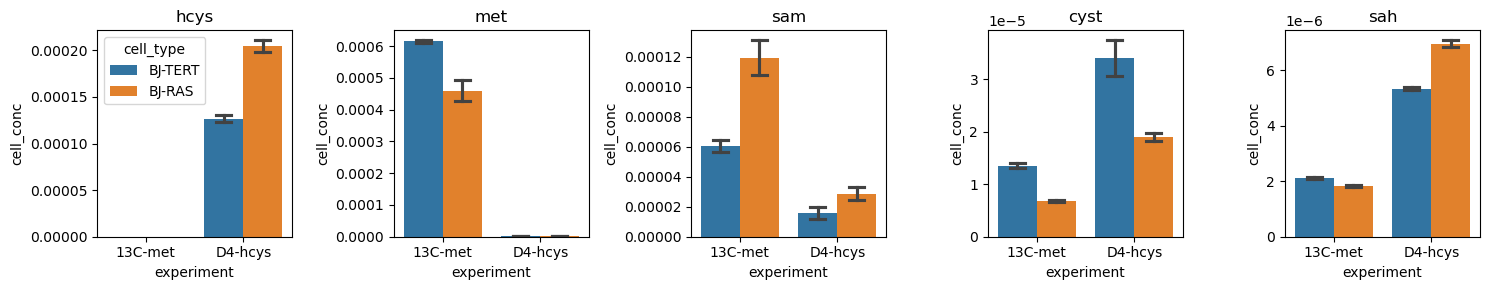

In [208]:
fig, axs = plt.subplots(ncols=len(measured_metabolites), figsize=(15,3))
for i, metabolite in enumerate(measured_metabolites):
    sns.barplot(
        cell_concentration_all\
            .xs(metabolite, level='metabolite')\
            .sort_index(ascending=[True, False]),
        x='experiment', y='cell_conc', hue='cell_type',
        estimator=np.median, errorbar=lambda x: [x.min(), x.max()], capsize=0.3,
        ax=axs[i], legend=(i==0)
    )
    axs[i].set_title(metabolite)
fig.tight_layout()
plt.savefig(Path('plots') / 'cell_concentrations.pdf')

SAM / SAH ratio

In [122]:
sam_sah_ratio = (
    cell_concentration_all.xs('sam', level='metabolite')[['cell_conc']] /
    cell_concentration_all.xs('sah', level='metabolite')[['cell_conc']]).rename(columns={'cell_conc': 'sam_sah_ratio'})
sam_sah_ratio

sam_sah_ratio
experiment cell_type replicate_nr               
13C-met    BJ-RAS    1                 6.016E+01
                     2                 7.038E+01
           BJ-TERT   1                 3.089E+01
                     2                 2.597E+01
D4-hcys    BJ-RAS    1                 3.456E+00
                     2                 4.853E+00
           BJ-TERT   1                 3.675E+00
                     2                 2.224E+00

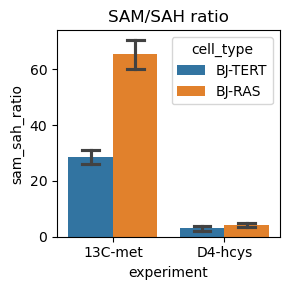

In [132]:
fig, axs = plt.subplots(ncols=1, figsize=(3,3))
sns.barplot(
    sam_sah_ratio.sort_index(ascending=[True, False]),
    x='experiment', y='sam_sah_ratio', hue='cell_type',
    estimator=np.median, errorbar=lambda x: [x.min(), x.max()], capsize=0.3
)
axs.set_title('SAM/SAH ratio')
fig.tight_layout()
plt.savefig(Path('plots') / 'sam_sah_ratio.pdf')

## Estimate uptake / release

In [154]:
def normalize_to_incubated(concentrations: pd.DataFrame) -> pd.DataFrame:
    est_conc = concentrations['est_conc_m']
    uptake_release = concentrations\
        .assign(diff_m = (est_conc - est_conc.xs('none', level='cell_type').mean()))
    return uptake_release[uptake_release.index.get_level_values('cell_type') != 'none']

In [155]:
medium_volume = 2e-3

### Methionine tracing

In [214]:
met_release = met_conc_estimation.xs('Medium', level='matrix')\
    .groupby(level='metabolite', group_keys=False)\
    .apply(normalize_to_incubated)
# release in mol per h, whole culure
met_release['release_mol_h'] = met_release['diff_m'] * medium_volume / 24
# in units of  pmol / h / uL cells 
met_release['release_pmol_h_uLcells'] = (met_release['release_mol_h'] * 1e12)\
    .divide(cell_dilution['total_cell_volume'] * 1e6)
met_release

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
hcys       BJ-RAS    1            8.988E-01 1.228E-01   1.000E-05   1.582E-06   
                     2            8.688E-01 1.227E-01   1.000E-05   1.644E-06   
           BJ-TERT   2            7.965E-01 1.174E-01   1.000E-05   1.729E-06   
met        BJ-RAS    1            9.361E-01 4.876E-01   1.000E-04   1.087E-04   
                     2            9.357E-01 4.907E-01   1.000E-04   1.103E-04   
           BJ-TERT   2            9.370E-01 5.149E-01   1.000E-04   1.220E-04   

                                      diff_m  release_mol_h  \
metabolite cell_type replicate_nr                             
hcys       BJ-RAS    1             1.236E-06      1.030E-10   
                     2             1.298E-06      1.081E-10   
           BJ-TERT   2             1.383E-06      1.153E-10   
met        BJ-RAS    1            -9.557E-06     -7.965E-10   
                     2            -7.997E-06     -6.664E-10   
           BJ-TERT   2             3.708E-06      3.090E-10   

                                   release_pmol_h_uLcells  
metabolite cell_type replicate_nr                          
hcys       BJ-RAS    1                          1.291E+02  
                     2                          1.356E+02  
           BJ-TERT   2                          1.494E+02  
met        BJ-RAS    1                         -9.986E+02  
                     2                         -8.356E+02  
           BJ-TERT   2                          4.005E+02

In [217]:
# mean and std.dev, in pmol
met_release_avg = met_release\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'release_pmol_h_uLcells': ['mean','std']})
met_release_avg

release_pmol_h_uLcells          
                                       mean       std
metabolite cell_type                                 
hcys       BJ-RAS                 1.323E+02 4.564E+00
           BJ-TERT                1.494E+02       NaN
met        BJ-RAS                -9.171E+02 1.153E+02
           BJ-TERT                4.005E+02       NaN

In [219]:
met_release_avg.to_csv(results_path / '13C-met_release_flux.csv')

### Homocysteine tracing

In [220]:
hcys_release = hcys_conc_estimation.xs('Medium', level='matrix')\
    .groupby(level='metabolite', group_keys=False)\
    .apply(normalize_to_incubated)
# release in mol per h, whole culure
hcys_release['release_mol_h'] = hcys_release['diff_m'] * medium_volume / 24
# in units of  pmol / h / uL cells 
hcys_release['release_pmol_h_uLcells'] = (hcys_release['release_mol_h'] * 1e12)\
    .divide(cell_dilution['total_cell_volume'] * 1e6)
hcys_release

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
hcys       BJ-RAS    1            9.910E-01 7.927E-01   5.000E-05   1.999E-04   
                     2            9.915E-01 7.927E-01   5.000E-05   1.993E-04   
           BJ-TERT   1            9.896E-01 8.028E-01   5.000E-05   2.149E-04   
                     2            9.907E-01 7.810E-01   5.000E-05   1.862E-04   
met        BJ-RAS    1            6.997E-01 1.316E-02   1.250E-05   2.395E-07   
                     2            7.144E-01 1.276E-02   1.250E-05   2.273E-07   
           BJ-TERT   1            5.840E-01 1.854E-02   1.250E-05   4.097E-07   
                     2            5.660E-01 1.299E-02   1.250E-05   2.936E-07   

                                      diff_m  release_mol_h  \
metabolite cell_type replicate_nr                             
hcys       BJ-RAS    1            -2.561E-05     -2.134E-09   
                     2            -2.614E-05     -2.178E-09   
           BJ-TERT   1            -1.054E-05     -8.780E-10   
                     2            -3.922E-05     -3.269E-09   
met        BJ-RAS    1             4.062E-08      3.385E-12   
                     2             2.837E-08      2.364E-12   
           BJ-TERT   1             2.108E-07      1.757E-11   
                     2             9.471E-08      7.892E-12   

                                   release_pmol_h_uLcells  
metabolite cell_type replicate_nr                          
hcys       BJ-RAS    1                         -2.675E+03  
                     2                         -2.731E+03  
           BJ-TERT   1                         -1.138E+03  
                     2                         -4.237E+03  
met        BJ-RAS    1                          4.245E+00  
                     2                          2.965E+00  
           BJ-TERT   1                          2.277E+01  
                     2                          1.023E+01

In [221]:
# mean and std.dev, 
hcys_release_avg = hcys_release\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'release_pmol_h_uLcells': ['mean','std']})
hcys_release_avg

release_pmol_h_uLcells          
                                       mean       std
metabolite cell_type                                 
hcys       BJ-RAS                -2.703E+03 3.920E+01
           BJ-TERT               -2.688E+03 2.191E+03
met        BJ-RAS                 3.605E+00 9.051E-01
           BJ-TERT                1.650E+01 8.868E+00

In [222]:
hcys_release_avg.to_csv(results_path / 'D4_hcys_release_flux.csv')